<a href="https://colab.research.google.com/github/dpolob/normalizacion/blob/master/Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUESTIONES SOBRE NORMALIZACION**

Creo un dataset sintetico con las siguientes características


* $X_1$ varia desde 5 hasta 15
*   $X_2$ varia desde -10 hasta +10
*  La salida será categorica (0-1) cumpliendo la siguiente condición: $Y =  \begin{cases} 
0 & \quad \text{si } X_1+X_2\leq10\\1 & \quad \text{si } X_1+X_2>10\end{cases}$


In [0]:
%matplotlib inline
import numpy as np

v1 = (15 - 5) * np.random.random_sample(5000) + 5
v2 = (10 + 10) * np.random.random_sample(5000) - 10
y = v1 + v2
y = (1 * (y <= 10)).astype(int)  # convertir de booleano (v1+v1<=10) a 0 y 1

dataset = np.column_stack((v1, v2))
dataset = np.column_stack((dataset, y))
print(dataset.shape)

(5000, 3)


Graficando el dataset vemos que esta dividido por una línea

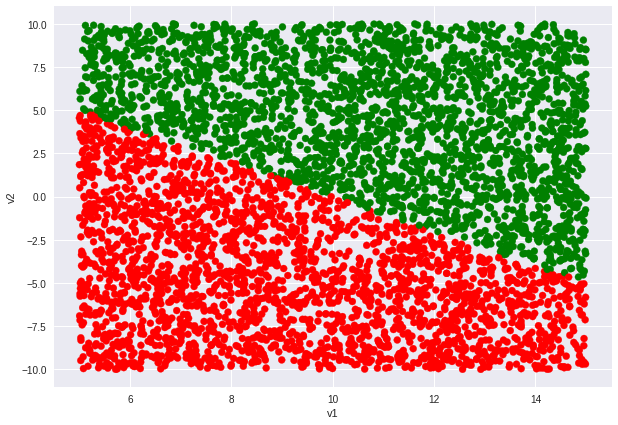

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7) # (w, h)

color =np.where(dataset[:,2] == 1., 'red', 'green')
plt.scatter(v1, v2, c=color)
plt.xlabel("v1")
plt.ylabel("v2")
plt.show()

Procedemos a la normalizacion con StandarScaler, que realiza el escalado mediante $X_i^{norm} = \frac{x_i-\bar{x}}{\sigma}$

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset[:, :-1])
datasetNorm = np.column_stack((scaler.transform(dataset[:, :-1]), dataset[:,-1]))
print(scaler.scale_, scaler.mean_, scaler.var_, scaler.n_samples_seen_)
print(datasetNorm.shape)

[2.9206087  5.78650476] [1.00077326e+01 6.77795411e-03] [ 8.52995517 33.48363737] 5000
(5000, 3)


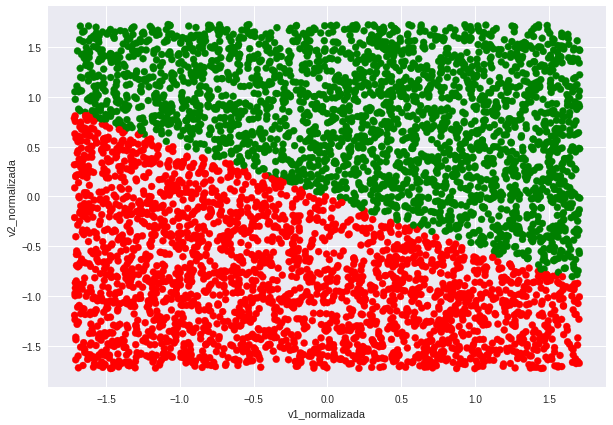

In [0]:
plt.scatter(datasetNorm[:,0], datasetNorm[:,1], c=color)
plt.xlabel("v1_normalizada")
plt.ylabel("v2_normalizada")
plt.show()

Entrenamos un modelo SVC

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9973333333333333


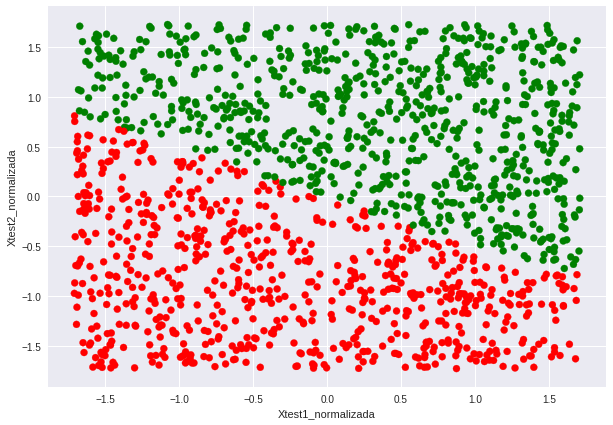

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(datasetNorm[:,:-1], datasetNorm[:,-1], test_size=0.30)

modelo = SVC()
modelo.fit(X_train, y_train)

# predecir el set de test
y_pred = modelo.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

color = np.where(y_pred == 1., 'red', 'green')
plt.scatter(X_test[:,0], X_test[:,1], c=color)
plt.xlabel("Xtest1_normalizada")
plt.ylabel("Xtest2_normalizada")
plt.show()






Una vez comprobado que el modelo funciona correctamente podemos probar con diferentes dataset a ver que pasa:


1.   Dataset en el entorno $V_1= [8 , 10]$  y $V_2=[-2,5 , 7,5]$




(50, 3)


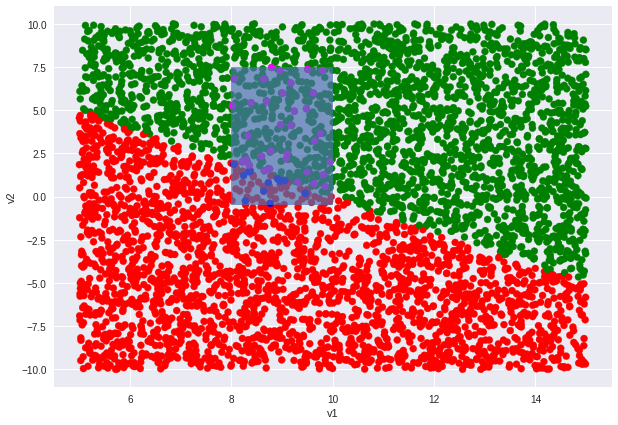

In [0]:
condicion = np.where((dataset[:, 0] >= 8) & (dataset[:, 0] <= 10) &
                     (dataset[:, 1] >= -0.5) & (dataset[:, 1] <= 7.5))
dataset1 = dataset[condicion]
# tomamos 50 valores aleatorios
a = range(dataset1.shape[0])
dataset1=dataset1[np.random.choice(a, 50),:]
print(dataset1.shape)

color = np.where(dataset[:,-1] == 1, 'red', 'green')
plt.scatter(dataset[:,0], dataset[:,1], c=color)
color = np.where(dataset1[:,-1] == 1, 'blue', 'magenta')
plt.scatter(dataset1[:,0], dataset1[:,1], c=color)
ax = plt.gca()
from matplotlib.patches import Rectangle
rect = Rectangle((8, -0.5), 2, 8, fill=True, alpha=0.7)
ax.add_patch(rect)
plt.xlabel("v1")
plt.ylabel("v2")
plt.show()

Si escalamos usando el StandarScaler con este dataset vemos que el acierto es bastante peor

[0.53620973 2.34998659] [8.96296164 2.90701234] [0.28752087 5.52243698] 50
0.68


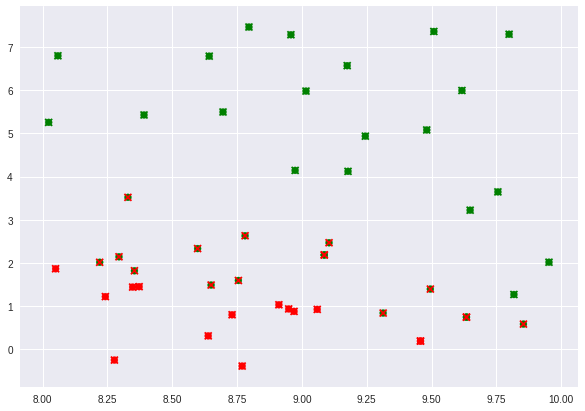

In [0]:
scaler1 = StandardScaler()
scaler1.fit(dataset1[:,:-1])
dataset1Norm = scaler1.transform(dataset1[:,:-1])
print(scaler1.scale_, scaler1.mean_, scaler1.var_, scaler1.n_samples_seen_)

y_pred1 = modelo.predict(dataset1Norm)
print("Accuracy: {}".format(accuracy_score(dataset1[:,-1], y_pred1)))

color = np.where(dataset1[:,-1] == 1, 'red', 'green')
plt.scatter(dataset1[:,0], dataset1[:,1], c=color)
color = np.where(y_pred1 == 1, 'red', 'green')
plt.scatter(dataset1[:,0], dataset1[:,1], c=color, marker='x')
plt.show()

pero si hacemos lo mismo utilizando el StandardScaler de antes el error es mucho menor

0.98


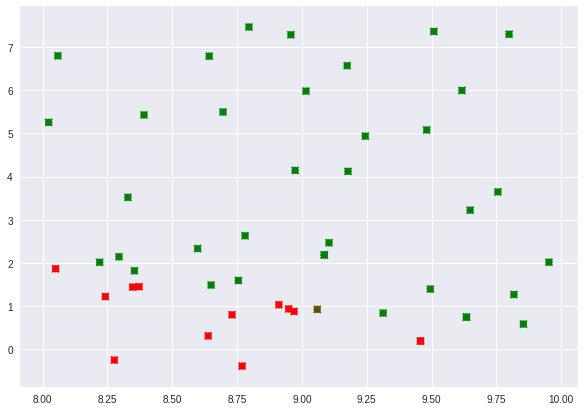

In [0]:
dataset2Norm = scaler.transform(dataset1[:,:-1])

y_pred2 = modelo.predict(dataset2Norm)
print("Accuracy: {}".format(accuracy_score(dataset1[:,-1], y_pred2)))

color = np.where(dataset1[:,-1] == 1, 'red', 'green')
plt.scatter(dataset1[:,0], dataset1[:,1], c=color)
color = np.where(y_pred2 == 1, 'red', 'green')
plt.scatter(dataset1[:,0], dataset1[:,1], c=color, marker='x')
plt.show()